<h2> DATA 115: Introduction to Data Analytics. Fall 2024 </h2>
<h3> Problem Set 3 </h3>
<h3> Team <i> 4 </i></h3>
<h3><ul>
    <li>Melvin Manning</li> 
    <li>Max Durben</li> 
    <li>Nathan Feltmann</li> 
    <li>Jack Palmer</li>
    <i> (only those who contributed to the group work)</i> 
    <li>Melvin Manning</li>
    <li>Jack Palmer </li>
    <li>Nathan Feltman</li>
    <li>Max Durben </li>
    </h3>

#### 1. In your own words, provide a definition or a short description for each of the following terms (and explain how they are different for the pairs of items):

##### (a) Probability density function vs probability mass function.

- **(i) PDF**  
  Describes the probability density of a continuous random varible. Think the possible values of a persons height or weight between a certain goal. 

- **(ii) PMF**  
  Describes the probability of a discrete random varible with a specific value. Think the probabilty of a coin toss. All probibilities must add to equal 1.

- **(iii) Differences**
  The difference is pdf is used for continuous data and pmf is used for discrete outcomes (probability for each value)

##### (b) Total Sum of Squares vs Model Sum of Squares in the linear regression model.

- **(i) Total Sum of Squares**  
  The total variation in data. Its measured how far each value is from the mean.

- **(ii) Model Sum of Squares**  
  The part of total variation explained by a regression model. It measures how far those predictions are from the mean

- **(iii) Differences**  
  Total Sum of Squares is totoal variation depending on the varible while Model Sum of Squares is how much variation accounts for

##### (c) Linear Regression vs Logistic Regression. Given an example of a dataset/variable that would be appropriate to analyze with a linear regression and another one that would be appropriate to analyze with a logistic regression.

- **(i) Linear Regression**  
  Used for predicting a contiuous number. Makes a line describing the chances with different predictors. An example would be predicting the price of a house by looking at square feet and bedroom count.

- **(ii) Logistic Regression**  
  Used for predicting binary outcomes. It basically predicts the probability of belonging to a category of two. An example would be finding out if a bank transaction is legit or not based on amount, time, and location.


#### 2. Load the data in `Air_Quality` as a dataframe in Python. 

##### (a) Compute the mean and the standard deviation of the `PM_Concentration` variable.

##### (b) Make a density histogram of the `PM_Concentration` variable and overlay a plot of the normal distribution with mean and standard deviation from part (a) on the same plot.

##### (c) Is the normal distribution a good fit for this variable? Briefly explain

Mean of PM_Concentration: 3.526239855725879
Standard Deviation of PM_Concentration: 2.4239677210751838


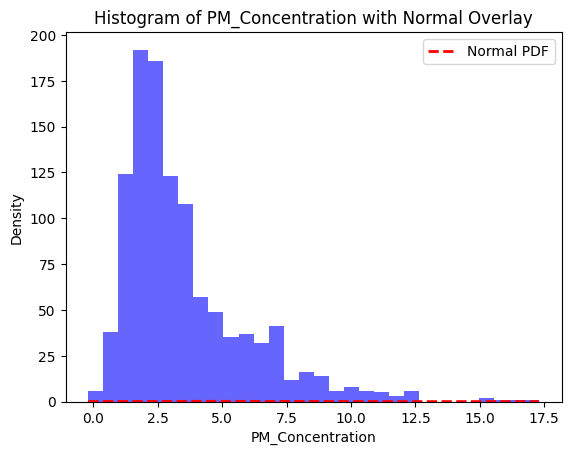

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Load the dataset
df = pd.read_csv('Air_Quality.csv')

#Mean and Standard Deviation of 'PM_Concentration'
mean_val = df['PM_Concentration'].mean()
std_val = df['PM_Concentration'].std()
print("Mean of PM_Concentration:", mean_val)
print("Standard Deviation of PM_Concentration:", std_val)

# Plotting the histogram of 'PM_Concentration'
pm = df['PM_Concentration']

#Plot the histogram
plt.hist(pm, bins=30, color='blue', alpha=0.6)

#Create an array of x values from min to max
x = np.linspace(pm.min(), pm.max(), 200)

#Calculate the PDF using the mean and standard deviation (Used help from https://stackoverflow.com/questions/18172283/how-to-plot-a-normal-distribution-with-matplotlib)
pdf = (1.0 / (std_val * math.sqrt(2 * math.pi))) * \
np.exp(-0.5 * ((x - mean_val) / std_val) ** 2)

#Plot the PDF
plt.plot(x, pdf, 'r--', linewidth=2, label='Normal PDF')

#Add labels and title
plt.xlabel('PM_Concentration')
plt.ylabel('Density')
plt.title('Histogram of PM_Concentration with Normal Overlay')
plt.legend()
plt.show()

#### 3. Load the data in `education_income` as a dataframe in Python.

##### (a) Make a scatterplot of the percentage of BS holders against the median HH income by state.

##### (b) Based on this plot, do you think linear regression is appropriate to attempt? Briefly explain

##### (c) Fit a simple linear model to this pair of columns and overlay the best fit line on the scatterplot from part (a).

##### (d) Write the linear regression equation and report the value of the coefficient of determination.

##### (e) Make a QQ plot of the residuals to check if they are normally distributed. What do you conclude? 

##### (f) Plot the residuals against the fitted values. Do you notice anything concerning?

##### (g) Choose two other columns from the dataframe and repeat steps (a)-(f). Do you observe any differences in the main results for these new columns?

#### 4. Load the data in `Advertising` as a dataframe in Python. 

##### (a) Each row of this data set represents a single media market and the `TV`, `newspaper`, and `radio` variables contain spending amount related to each media type while the `sales` variable is the number of units sold (in thousands) in that market. Make a scatterplot matrix of these variables. Based on this plot, do you think multiple linear regression is appropriate to attempt? Briefly explain.

From observing the Scatterplot Matrix it can be concluded that both Radio and TV have a linear relationship with sales, thus making multiple linear regression appropriate to attempt. Newspaper's relationship on the other hand is less clear but based on Radio and TV multiple linear regression can still be attempted.

##### (b) Fit a multiple linear regression model using all three media variables as predictors with the sales column as the response variable.

##### (c) Write the linear regression equation and report the value of the coefficient of determination.

The coefficient of determination is 0.897

##### (d) How many sales would your model predict for a market that spent 200 on TV, 50 on radio, and 100 on newspaper?
Constant: 2.9389
TV: 0.0458 * 200 = 9.16
Radio: 0.1885 * 50 = 9.425
Newspaper: -0.001 * 100 = -0.1

Total: 2.9389 + 9.16 + 9.425 -0.1 = 21.4239.
The model predicts 21,424 sales in a market that spent 200 on TV, 50 on radio, and 100 on newspaper.

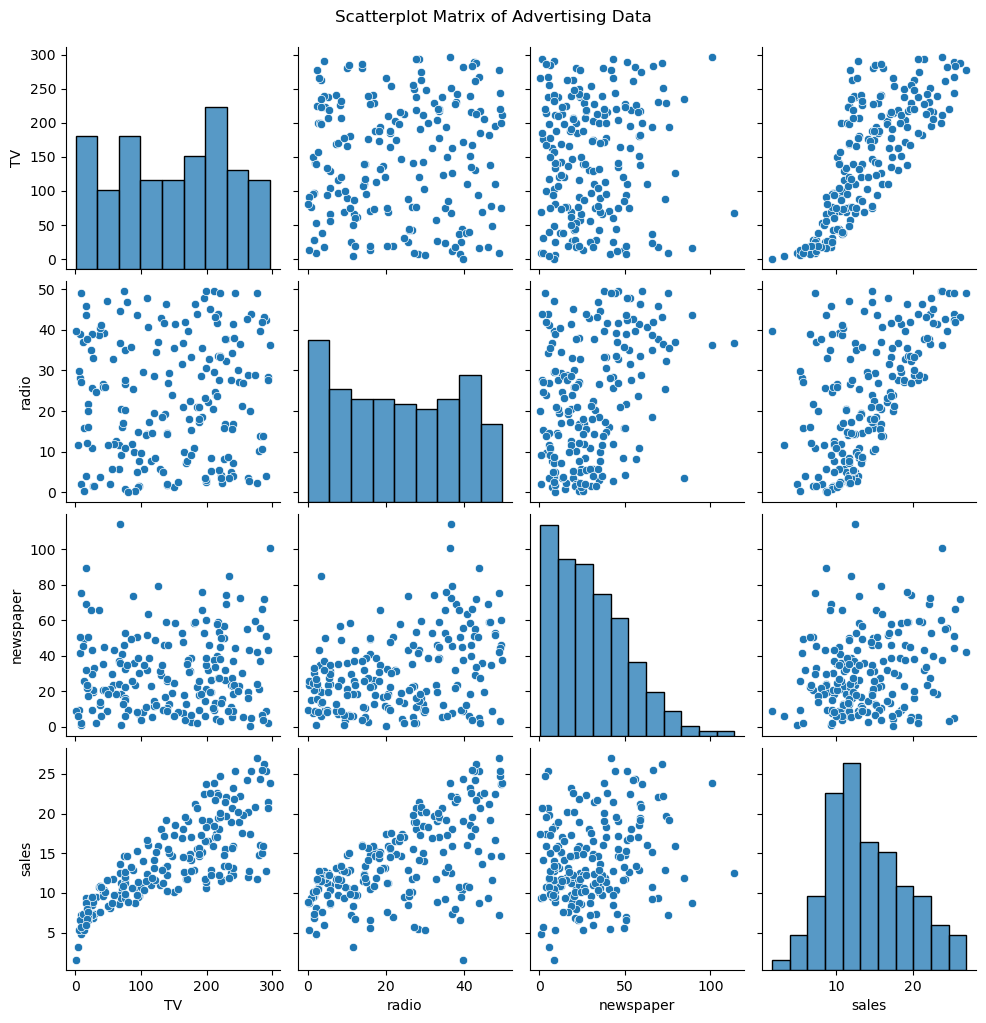

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from io import StringIO

df = pd.read_csv('Advertising.csv', index_col=0)

sns.pairplot(df, vars=['TV', 'radio', 'newspaper', 'sales'])
plt.suptitle('Scatterplot Matrix of Advertising Data', y=1.02)
plt.show()

In [23]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("Advertising.csv", index_col=0)

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           1.58e-96
Time:                        15:09:42   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [25]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("Advertising.csv", index_col=0)
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
intercept = model.params['const']
tv_coef = model.params['TV']
radio_coef = model.params['radio']
news_coef = model.params['newspaper']
r_squared = model.rsquared

print("Linear Regression Equation:")
print(f"Sales = {intercept:.3f} + {tv_coef:.4f}*TV + {radio_coef:.4f}*Radio + {news_coef:.4f}*Newspaper")
print(f"\nCoefficient of Determination (R²): {r_squared:.3f}")

Linear Regression Equation:
Sales = 2.939 + 0.0458*TV + 0.1885*Radio + -0.0010*Newspaper

Coefficient of Determination (R²): 0.897


#### 5. Load the data in `defaults` as a dataframe in Python. 

##### (a) Fit a logistic regression model to this data with `default` as the response variable and `balance` as a predictor variable.

##### (b) Compute the coefficients of the fitted model and write the corresponding equation for the log odds.

##### (c) What percentage of the provided data does your model correctly classify?

##### (d) Use your model to predict whether someone with a balance of 1950 is likely to default. What is the corresponding probability of this individual defaulting according to your regression model?